In [1]:
import numpy as np # import numpy 
import pandas as pd # import pandas
import matplotlib.pyplot as plt # import visualization libraries
%matplotlib inline
import seaborn as sns

import scipy.stats as stats # import stats

import warnings
warnings.filterwarnings('ignore')

#### 1.	Suppose weights of the checked baggage of airline passengers follow a nearly normal distribution with mean 45 pounds and standard deviation 3.2 pounds. Most airlines charge a fee for baggage that weigh in excess of 50 pounds.
a. Determine what percent of airline passengers incur this fee?

b. If the limit of baggage weight is decreased to 48 pounds, what percent of airline passengers do not incur fee? 

c. What should be the baggage limit in order to have at least 10 % of airline passengers incur fee.

In [37]:
# 1.a.

mu = 45 # popultion mean
s_d = 3.2 # population standatd deviations
x_bar = 50 # sample mean

z_stats = (x_bar-mu)/s_d 

print('Z_Statistics: ', z_stats)

print(round(1-stats.norm.cdf(z_stats),4)*100,'% percent of airline passengers incur this fee') # ans

Z_Statistics:  1.5625
5.91 % percent of airline passengers incur this fee


In [38]:
# 1.b.
x_bar_new = 48 # updated sample mean

z_stats_updated = (x_bar_new-mu)/s_d

print('Z_Statistics: ', z_stats_updated)

print(round(stats.norm.cdf(z_stats_updated),4)*100,'% percent of airline passengers will not incur this fee') # ans

Z_Statistics:  0.9375
82.57 % percent of airline passengers will not incur this fee


In [4]:
# 1.c.
p_val = 0.9 # probability 
print('baggage limit will be', stats.norm.isf(p_val)*s_d+mu, 
      'in order to have at least 10 % of airline passengers incur fee')

baggage limit will be 40.89903499025728 in order to have at least 10 % of airline passengers incur fee


#### 2. A principal of a prestigious city college claims that the average intelligence of the students of the college is above average.
A random sample of 100 students IQ scores have a mean score of 115. The mean population mean IQ is 100 with a standard deviation of 15.

###### Is there sufficient evidence to support the principal's claim?

In [39]:
# null hypothesis: Average Intelligence = 100
# alternate hypothesis: Average Intelligence > 100

z_value_critical = stats.norm.isf(0.05)
print(z_value_critical)

mu = 100
sd = 15
x_bar = 115
n = 100

z_cal = (x_bar - mu) / (sd/np.sqrt(n))
print(z_cal)

if z_value_critical<z_cal:
    print("Reject null hypothesis. There is sufficient evidence to support the principal's claim")
else:
    print("We failed to reject null hypothesis. There is no sufficient evidence to support the principal's claim")

1.6448536269514729
10.0
Reject null hypothesis. There is sufficient evidence to support the principal's claim


#### 3. Suppose that a doctor claims that 17 year olds have an average body temperature that is higher than the commonly accepted average human temperature of 98.6 degree F. A simple random statistical sample of 25 people, each of age 17 is selected.

Temp = [98.56, 98.66, 97.54, 98.71, 99.22, 99.49, 98.14, 98.84, 99.28, 98.48, 98.88, 97.29, 98.88, 99.07, 98.81, 99.49, 98.57, 97.98, 97.75, 97.69, 99.28, 98.52, 98.82, 98.81, 98.22]

In [40]:
# null hypothesis: mean temperature = 98.6
# alternate hypothesis: mean temperature > 98.6

from scipy.stats import ttest_1samp # import suitable test

temp = np.array([98.56, 98.66, 97.54, 98.71, 99.22, 99.49, 98.14, 98.84, 99.28, 98.48, 98.88, 97.29, 98.88, 99.07, 
                 98.81, 99.49, 98.57, 97.98, 97.75, 97.69, 99.28, 98.52, 98.82, 98.81, 98.22]) # all the observations

temp_mean = temp.mean() # Sample mean
temp_variance = np.std(temp, ddof=1) # Sample variance

print('Mean Value: ', temp_mean) # print the sample mean value
print('Variance Value: ', temp_variance) # print sample variance

print(ttest_1samp(temp, 98.6)) # print test results

if ttest_1samp(temp, 98.6)[1]<0.05:
    print("reject null hypothesis, there is sufficient evidence to support the dr's claim")
else:
    print("We failed to reject null hypothesis, there is no sufficient evidence to support the dr's claim")

Mean Value:  98.59919999999998
Variance Value:  0.5998258080476344
Ttest_1sampResult(statistic=-0.006668602694974534, pvalue=0.9947343867528586)
We failed to reject null hypothesis, there is no sufficient evidence to support the dr's claim


#### 4. Compare two unrelated samples. Data was collected on the weight loss of 16 women and 20 men enrolled in a weight reduction program. At $\alpha$ = 0.05, test whether the weight loss of these two samples is different.

Weight_loss_Male   = [ 3.69, 4.12, 4.65, 3.19,  4.34, 3.68, 4.12, 4.50, 3.70, 3.09,3.65, 4.73, 3.93, 3.46, 3.28, 4.43, 4.13, 3.62, 3.71, 2.92]
Weight_loss_Female = [2.99, 1.80, 3.79, 4.12, 1.76, 3.50, 3.61, 2.32, 3.67, 4.26, 4.57, 3.01, 3.82, 4.33, 3.40, 3.86]

In [41]:
# null hypothesis: mean weight loss male - mean weight loss female = 0
# alternate hypothesis: mean weight loss male - mean weight loss female != 0

Weight_loss_Male = [ 3.69, 4.12, 4.65, 3.19, 4.34, 3.68, 4.12, 4.50, 3.70, 3.09,3.65, 4.73, 3.93, 3.46, 3.28, 
                    4.43, 4.13, 3.62, 3.71, 2.92] 
Weight_loss_Female = [2.99, 1.80, 3.79, 4.12, 1.76, 3.50, 3.61, 2.32, 3.67, 4.26, 4.57, 3.01, 3.82, 4.33, 3.40, 3.86]

from scipy.stats import ttest_ind

print(ttest_ind(Weight_loss_Female, Weight_loss_Male))

if ttest_ind(Weight_loss_Female, Weight_loss_Male)[1]<0.05:
    print('Reject null hypothesis, There is sufficient evidance that weightloss of two samples is different')
else:
    print('We failed to reject null hypothesis, Weightloss of two samples is same')

Ttest_indResult(statistic=-1.827188295981286, pvalue=0.0764604205335295)
We failed to reject null hypothesis, Weightloss of two samples is same


#### 5. Compare the following two unrelated samples. Data was collected on the weight of women and men enrolled in a weight reduction program. At $\alpha$ = 0.05, test whether the weight of these two samples is different.
Weight_Female = [ 53.8, 54.4, 51.2, 52.5, 61.0, 50.6, 51.6, 70.0]  
Weight_Male = [ 72.5, 80.3, 71.3, 67.7, 66.2, 73.4, 61.3, 76.8]

In [42]:
# null hypothesis: mean weight male - mean weight female = 0
# alternate hypothesis: mean weight male - mean weight female != 0

Weight_Female = [ 53.8, 54.4, 51.2, 52.5, 61.0, 50.6, 51.6, 70.0]
Weight_Male = [ 72.5, 80.3, 71.3, 67.7, 66.2, 73.4, 61.3, 76.8]


from scipy.stats import ttest_ind

print(ttest_ind(Weight_Female, Weight_Male))

if ttest_ind(Weight_Female, Weight_Male)[1]<0.05:
    print('Reject null hypothesis, There is sufficient evidance that weight of two samples is different')
else:
    print('We failed to reject null hypothesis, There is no sufficient evidance that weight of samples are different')

Ttest_indResult(statistic=-4.886344172533444, pvalue=0.00024034957515992796)
Reject null hypothesis, There is sufficient evidance that weight of two samples is different


#### 6. Compare two related samples. Data was collected on the marks scored by 25 students in their final practice exam and the marks scored by the students after attending special coaching classes conducted by their college. At 5% level of significance, is there any evidence that the coaching classes has any effect on the marks scored.

Marks_before = [ 52, 56, 61, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 44, 52, 45, 57, 60, 45]  
Marks_after  = [62, 64, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 82, 62, 49, 44, 43, 77, 61, 67, 67, 54]

In [43]:
# null hypothesis: average marks after - average marks before = 0
# alternate hypothesis: average marks after - average marks before != 0

Marks_before = [ 52, 56, 61, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 44, 52, 45, 57, 60, 45]
Marks_after = [62, 64, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 82, 62, 49, 44, 43, 77, 61, 67, 67, 54]

from scipy.stats import ttest_rel

print(ttest_rel(Marks_after, Marks_before))

if ttest_rel(Marks_after, Marks_before)[1]<0.05:
    print('\nReject null hypothesis. There is sufficient evidance that coaching classes have effect on scored marks')
else:
    print('\nFailed to reject null hypothesis. There is no evidance that coaching classes have effect on marks')

Ttest_relResult(statistic=3.404831324883169, pvalue=0.0023297583680290364)

Reject null hypothesis. There is sufficient evidance that coaching classes have effect on scored marks


#### 7. Alchohol consumption before and after love failure is given in the following table. Conduct a paired t test to check whether the alcholhol consumption is more after the love failure at 5% level of significance.

Alchohol_Consumption_before = [470, 354, 496, 351, 349, 449, 378, 359, 469, 329, 389, 497, 493, 268, 445, 287, 338, 271, 412, 335]
Alchohol_Consumption_after  = [408, 439, 321, 437, 335, 344, 318, 492, 531, 417, 358, 391, 398, 394, 508, 399, 345, 341, 326, 467]

In [44]:
# null hypothesis: alcohol consumption after - alcohol consumption before = 0
# alternate hypothesis: alcohol consumption after - alcohol consumption before != 0

Alchohol_Consumption_before = [470, 354, 496, 351, 349, 449, 378, 359, 469, 329, 389, 497, 493, 268, 445, 287, 
                               338, 271, 412, 335] 
Alchohol_Consumption_after = [408, 439, 321, 437, 335, 344, 318, 492, 531, 417, 358, 391, 398, 394, 508, 399, 
                              345, 341, 326, 467]

from scipy.stats import ttest_rel

print(ttest_rel(Alchohol_Consumption_after, Alchohol_Consumption_before))

if ttest_rel(Alchohol_Consumption_after, Alchohol_Consumption_before)[1]<0.05:
    print('\nReject null hypothesis. There is sufficient evidance that love failure effects on alcohol consumption')
else:
    print('\nFailed to reject null hypothesis. There is no evidance that love failure effects on alcohol consumption')

Ttest_relResult(statistic=0.5375404241815105, pvalue=0.5971346738292477)

Failed to reject null hypothesis. There is no evidance that love failure effects on alcohol consumption


#### 8. Here weight of 25 people were recorded before they had a new therapy and then again 6 months later. Check if new therapy leads to a change in weight.
wt_before = [76, 76, 72, 73, 64, 63, 75, 75, 71, 76, 71, 76, 78, 73, 76, 70, 71, 82, 84, 68, 70, 68, 66, 67, 74]   
wt_after  = [63, 72, 67, 69, 58, 59, 70, 71, 70, 71, 68, 71, 72, 69, 72, 67, 67, 78, 79, 62, 67, 63, 61, 63, 69]    
At 5% level of significance, is there any evidence that the new therapy has any effect on the weight of the participants?

In [45]:
# null hypothesis: average weight after therapy - average weight before therapy = 0
# alternate hypothesis: average weight after therapy - average weight before therapy != 0

wt_before = [76, 76, 72, 73, 64, 63, 75, 75, 71, 76, 71, 76, 78, 73, 76, 70, 71, 82, 84, 68, 70, 68, 66, 67, 74]
wt_after = [63, 72, 67, 69, 58, 59, 70, 71, 70, 71, 68, 71, 72, 69, 72, 67, 67, 78, 79, 62, 67, 63, 61, 63, 69]

from scipy.stats import ttest_rel

print(ttest_rel(wt_after, wt_before))

if ttest_rel(wt_after, wt_before)[1]<0.05:
    print('\nReject null hypothesis. There is sufficient evidance that therapy effects on weight loss')
else:
    print('\nFailed to reject null hypothesis. There is no evidance that therapy effects on weight loss')

Ttest_relResult(statistic=-11.381954836452902, pvalue=3.7046511777805025e-11)

Reject null hypothesis. There is sufficient evidance that therapy effects on weight loss


#### 9.The following data represent the amount of soft drink filled in a sample of 50 consecutive 2-liter bottles as shown below:

volume = [2.109, 2.086, 2.066, 2.075, 2.065, 2.057, 2.052, 2.044, 2.036, 2.038, 
          2.031, 2.029, 2.025, 2.029, 2.023, 2.020, 2.015, 2.014, 2.013, 2.014, 
          2.012, 2.012, 2.012, 2.010, 2.005, 2.003, 1.999, 1.996, 1.997, 1.992, 
          1.994, 1.986, 1.984, 1.981, 1.973, 1.975, 1.971, 1.969, 1.966, 1.967, 
          1.963, 1.957, 1.951, 1.951, 1.947, 1.941, 1.941, 1.938, 1.908, 1.894]

At 5% level of significance, is there evidence that the mean amount of soft drink filled is different from 2 litres?

In [46]:
# null hypothesis: mean amount = 2
# alternate hypothesis: mean amount != 2

from scipy.stats import ttest_1samp # import suitable test

volume = np.array([2.109, 2.086, 2.066, 2.075, 2.065, 2.057, 2.052, 2.044, 2.036, 2.038, 
                   2.031, 2.029, 2.025, 2.029, 2.023, 2.020, 2.015, 2.014, 2.013, 2.014, 
                   2.012, 2.012, 2.012, 2.010, 2.005, 2.003, 1.999, 1.996, 1.997, 1.992, 
                   1.994, 1.986, 1.984, 1.981, 1.973, 1.975, 1.971, 1.969, 1.966, 1.967, 
                   1.963, 1.957, 1.951, 1.951, 1.947, 1.941, 1.941, 1.938, 1.908, 1.894]) # all the observations

volume_mean = volume.mean() # Sample mean
volume_variance = np.std(volume, ddof=1) # Sample variance

print('Mean Value: ', volume_mean) # print the sample mean value
print('Variance Value: ', volume_variance) # print sample variance

print('\n',ttest_1samp(volume, 2.0)) # print test results

if ttest_1samp(volume, 2.5)[1]<0.05:
    print("\nReject null hypothesis.")
    print('There is sufficient evidence that mean amount of soft drink filled is different from 2 litres')
else:
    print("\nFailed to reject null hypothesis.")
    print('There is not sufficient evidence that mean amount of soft drink filled is different from 2 litres')

Mean Value:  2.00072
Variance Value:  0.04456366232705744

 Ttest_1sampResult(statistic=0.11424484790269986, pvalue=0.9095105442498921)

Reject null hypothesis.
There is sufficient evidence that mean amount of soft drink filled is different from 2 litres


#### 10.Sugar consumption in grams of 20 patients (both diabetic and non-diabetic) are given below:

At 5% level of significance, is there evidence that the mean sugar consumption is different for diabetic and non-diabetic?** In the following table, 0 means diabetic and 1 means non-diabetic.

[[9.31, 0],[7.76, 0],[6.98, 1],[7.88, 1],[8.49, 1],[10.05, 1],[8.80, 1],[10.88, 1],[6.13, 1], [7.90, 1], [11.51, 0],[12.59, 0],[7.05, 1],[11.85, 0],[9.99, 0],[7.48, 0],[8.79, 0],[8.69, 1],[9.68, 0],[8.58, 1], [9.19, 0],[8.11, 1]]

In [47]:
# null hypothesis: mean sugar consumption of diabetic = mean sugar consumption of non-diabetic
# alternate hypothesis: mean sugar consumption of diabetic != mean sugar consumption of non-diabetic

consumption = np.array([[9.31, 0],[7.76, 0],[6.98, 1],[7.88, 1],[8.49, 1],[10.05, 1],[8.80, 1],[10.88, 1],
                        [6.13, 1],[7.90, 1], [11.51, 0],[12.59, 0],[7.05, 1],[11.85, 0],[9.99, 0],[7.48, 0],
                        [8.79, 0],[8.69, 1],[9.68, 0],[8.58, 1], [9.19, 0],[8.11, 1]])

sugar_diabetic = consumption[:,1] == 0
sugar_diabetic = consumption[sugar_diabetic][:,0]
sugar_non_diabetic = consumption[:,1] == 1
sugar_non_diabetic = consumption[sugar_non_diabetic][:,0]

from scipy.stats import ttest_ind

print(ttest_ind(sugar_diabetic, sugar_non_diabetic))

if ttest_ind(sugar_diabetic, sugar_non_diabetic)[1]<0.05:
    print('\nReject null hypothesis.')
    print('There is sufficient evidence that mean sugar consumption is different for diabetic and non-diabetic')
else:
    print('We failed to reject the null hypothesis.')
    print('There is no sufficient evidence that mean sugar consumption is different for diabetic and non-diabetic')

Ttest_indResult(statistic=2.3730593333971224, pvalue=0.02777741611352253)

Reject null hypothesis.
There is sufficient evidence that mean sugar consumption is different for diabetic and non-diabetic


#### 11. The delivery time of Pizza from an online food deliery service firm and the home delivery from a local restaurant are given below: At 5% level of significance, is the mean delivery time for online delivery food service firm is less than the mean delivery time for the home delivery from a local restaurant.

Pizza_delivery_online = [16.8, 11.7, 15.6, 16.7, 17.5, 18.1, 14.1, 21.8, 13.9, 20.8]   
Pizza_delivery_local  = [22.0, 15.2, 18.7, 15.6, 20.8, 19.5, 17.0, 19.5, 16.5, 24.0]

In [48]:
# null hypothesis: mean delivery time of online = mean delivery time of local
# alternate hypothesis: mean delivery time of online < mean delivery time of local

Pizza_delivery_online = [16.8, 11.7, 15.6, 16.7, 17.5, 18.1, 14.1, 21.8, 13.9, 20.8]
Pizza_delivery_local = [22.0, 15.2, 18.7, 15.6, 20.8, 19.5, 17.0, 19.5, 16.5, 24.0]

from scipy.stats import ttest_ind

print(ttest_ind(Pizza_delivery_local, Pizza_delivery_online))

if ttest_ind(Pizza_delivery_local, Pizza_delivery_online)[1]<0.05:
    print('\nReject null hypothesis.')
    print('There is sufficient evidence that mean delivery time on online is less than the local')
else:
    print('\nWe failed to reject the null hypothesis.')
    print('There is no sufficient evidence that mean delivery time on online is less than the local')

Ttest_indResult(statistic=1.6341014912018457, pvalue=0.11960554332464257)

We failed to reject the null hypothesis.
There is no sufficient evidence that mean delivery time on online is less than the local


#### 12.The fill amount in 2-liter soft drink bottles is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If the bottles contain less than 95% of the listed net content (1.90 liters, in our case), the manufacturer may be subject to penalty by the state office of consumer affairs. Bottles that have a net content above 2.1 liters may cause excess spillage upon opening. What is the proportion of bottles that will contain

a) between 1.9 and 2.0 liters   
b) between 1.9 and 2.1 liters    
c) below 1.9 liters or above 2.1 liters    
d) At least how much soft drink is contained in 99% of the bottles?

In [49]:
# 12.a.
mu = 2
sd = 0.05

print('proportion of bottles that will contain between 1.9 and 2.0 liters is ',
     round(stats.norm.cdf(2.0, mu, sd) - stats.norm.cdf(1.9, mu, sd),4)*100,'%')

proportion of bottles that will contain between 1.9 and 2.0 liters is  47.72 %


In [50]:
# 12.b.
print('proportion of bottles that will contain between 1.9 and 2.1 liters is ',
     round(stats.norm.cdf(2.1, mu, sd) - stats.norm.cdf(1.9, mu, sd),4)*100,'%')

proportion of bottles that will contain between 1.9 and 2.1 liters is  95.45 %


In [51]:
# 12.c.
print('Proportion of bottles that will contain below 1.9 liters or above 2.1 liters',
      round((stats.norm.cdf(1.9, mu , sd) + (1 - stats.norm.cdf(2.1 , mu , sd))),4)*100,'%')

Proportion of bottles that will contain below 1.9 liters or above 2.1 liters 4.55 %


In [52]:
# 12.d.
print(round(stats.norm.isf(0.99 , mu , sd),4), 'litre soft drink is contained in 99% of the bottles.')

1.8837 litre soft drink is contained in 99% of the bottles.


#### 13.The following table contains the age of the vistors in the cricket stadium ( n =50).**

mpg = [38,36,31,30, 28,25, 26, 20, 20, 20, 21, 19, 21, 19, 21, 20, 20, 20, 19, 21, 
                21, 22, 20, 22, 20, 20, 22, 20, 22, 21, 19, 19, 20, 20, 21, 20, 19, 18, 20, 
                21, 21, 20, 21, 21, 20,  21, 24, 32, 35,38]

Decide whether the data appears to be normally distributed by    
a. Mean and median

Mean:  22.7
Median:  21.0


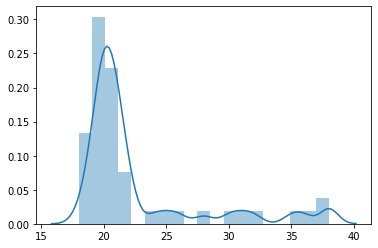

In [53]:
mpg = np.array([38, 36, 31, 30, 28,25, 26, 20, 20, 20, 21, 19, 21, 19, 21, 20, 20, 20, 19, 21, 21, 22, 20, 22, 20,
                20, 22, 20, 22, 21, 19, 19, 20, 20, 21, 20, 19, 18, 20, 21, 21, 20, 21, 21, 20, 21, 24, 32, 35, 38])
mean_mpg = np.mean(mpg)
median_mpg = np.median(mpg)

print('Mean: ', mean_mpg)
print('Median: ', median_mpg)

sns.distplot(mpg)
plt.show()

#### 14.The mean filling capacity for a coke bottle is 500 ml with a standard deviation of 20ml. The random variable filled capacity of the bottles follows a normal distribution.**

a. What is the probability that the bottle filled less than 480 ml?   
b. What is the probability that the bottle filled more than 520 ml?   
c. What is the probability that the bottle filled between 470 ml to 525 ml?

In [54]:
# 14.a.
mu = 500
sd = 20
print('Probability that the bottle filled less than 480 ml is: ', round(stats.norm.cdf(480, mu, sd),4))

Probability that the bottle filled less than 480 ml is:  0.1587


In [55]:
# 14.b.
print('Probability that the bottle filled more than 520 ml is: ', round(1 - stats.norm.cdf(520, mu, sd),4))

Probability that the bottle filled more than 520 ml is:  0.1587


In [56]:
# 14.c.
print('Probability that the bottle filled between 470 ml to 525 ml is: ', 
      round(stats.norm.cdf(525, mu, sd) - stats.norm.cdf(470, mu, sd),4))

Probability that the bottle filled between 470 ml to 525 ml is:  0.8275


#### 15.Hindustan Pencils Pvt. Ltd. is an Indian manufacturer of pencils, writing materials and other stationery items, established in 1958 in Mumbai. Nataraj brand of pencils manufactured by the company is expected to have a mean length of 172 mm and the standard deviation of the length is 0.02 mm. To ensure quality, a sample is selected at periodic intervals to determine whether the length is still 172 mm and other dimensions of the pencil meet the quality standards set by the company.You select a random sample of 100 pencils follows a normal distribution and the mean is 170 mm.**

a).Construct a 99% confidence interval for the pencil length.

In [57]:
x_bar = 172
sample_sd = 0.02
n = 100
sd = sample_sd/np.sqrt(n)

print('99% confidence interval: ', stats.norm.interval(0.99, 172, sd))

99% confidence interval:  (171.9948483413929, 172.0051516586071)


#### 16. The percentage of orders filled correctly at Wendy's was approximately 86.8%. Suppose that you go to drive-through window at Wendy's and place an order. Two friends of yours independently place orders at the drive-through window at the same Wendy's.

What are the probabilities that

a) all three  
b) none of the three  
c) atleast two of the three orders will be filled correctly?  
d) what is the mean and standard deviation of the orders filled correctly?  
e) Plot the binomial distribution function  

In [58]:
# 16.a.
p = 0.868 # percentage of orders filled correctly at Wendy's was approximately 86.8%
q = 1 - p
n = 3
k = np.arange(0,4)
print('all the three orders are filled correctly: ' , stats.binom.pmf(3,n,p))

all the three orders are filled correctly:  0.653972032


In [59]:
# 16.b.
print('none of the three orders are filled correctly: ' , stats.binom.pmf(0,n,p) )

none of the three orders are filled correctly:  0.002299968


In [60]:
# 16.c.
print('atleast two of the three orders will be filled correctly: ',
     stats.binom.pmf(2,n,p) + stats.binom.pmf(3,n,p))

atleast two of the three orders will be filled correctly:  0.9523279359999999


In [61]:
# 16.d.
mean = n*p
var = n*p*q
sd = np.sqrt(var)
print('Mean: ', mean)
print('SD: ', sd)

Mean:  2.604
SD:  0.5862832080146932


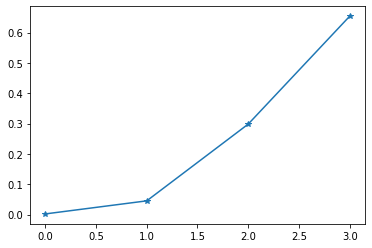

In [62]:
# 16.e.
binomial = stats.binom.pmf(k,n,p)
plt.plot(k, binomial, marker= '*')
plt.show()

#### 17. A Life Insurance agent sells on the average 3 life insurance policies per week. Use the Poisson law to calculate the probability that in a given week, he will sell

a) Some policies  
b) 2 or more but less than 5 policies?  
c) Plot the Poisson distribution function?  
Here 𝜆 = 3

In [63]:
# 17.a.
rate =  3 # which is the mean
n    =  np.arange(0,16)
poisson = stats.poisson.pmf(n,rate)
print(poisson)
print('\n',n)

print('\nProbability that the agent sells some policies: ' , 1 - poisson[0])

[4.97870684e-02 1.49361205e-01 2.24041808e-01 2.24041808e-01
 1.68031356e-01 1.00818813e-01 5.04094067e-02 2.16040315e-02
 8.10151179e-03 2.70050393e-03 8.10151179e-04 2.20950322e-04
 5.52375804e-05 1.27471339e-05 2.73152870e-06 5.46305740e-07]

 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Probability that the agent sells some policies:  0.950212931632136


In [64]:
# 17.b.
print('Agent sells 2 or more but less than 5 policies: ' , poisson[2]+poisson[3]+poisson[4])

Agent sells 2 or more but less than 5 policies:  0.6161149710523164


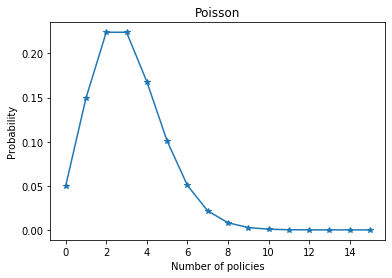

In [65]:
# 17.c.
plt.plot(n, poisson, marker= '*')
plt.title('Poisson')
plt.xlabel('Number of policies')
plt.ylabel('Probability')
plt.show()

#### 18. The mean salaries of Data Scientists working in Chennai, India is calculated to be 7,00,000 INR with a standard deviation of 90,000 INR. The random variable salary of Data Scientists follows a normal distribution.

a) What is the probability that a Data Scientist in Chennai has a salary more than 10,00,000 INR?  
b) What is the probability that a Data Scientist in Chennai has a salary between 6,00,000 & 9,00,000 INR?   
c) What is the probability that a Data Scientist in Chennai has a salary less than 4,00,000 INR?

In [66]:
# 18.a.
print('probability that a Data Scientist in Chennai has a salary more than 10,00,000 INR' , 
      1 - stats.norm.cdf(1000000,loc=700000,scale=90000))

probability that a Data Scientist in Chennai has a salary more than 10,00,000 INR 0.0004290603331967846


In [67]:
# 18.b.
print('probability that a Data Scientist in Chennai has a salary between 6,00,000 & 9,00,000 INR' ,
      stats.norm.cdf(900000,loc=700000,scale=90000) - stats.norm.cdf(600000,loc=700000,scale=90000))

probability that a Data Scientist in Chennai has a salary between 6,00,000 & 9,00,000 INR 0.8536055914064735


In [68]:
# 18.c.
print('probability that a Data Scientist in Chennai has a salary less than 4,00,000 INR' ,
      stats.norm.cdf(400000,loc=700000,scale=90000))

probability that a Data Scientist in Chennai has a salary less than 4,00,000 INR 0.0004290603331968372


#### 19. A sample of 100 diabetic patients was chosen to estimate the length of stay at a local hospital. The sample was 4.5 days and the population standard deviation was known to be 1.2 days.**

a) Calculate the 99% confidence interval for the population mean.

In [69]:
n = 100
mu = 4.5
sample_sd = 1.2
sd = sample_sd/np.sqrt(n)

print('99% Confidence Inerval: ', stats.norm.interval(0.99 , mu , sd))

99% Confidence Inerval:  (4.190900483574132, 4.809099516425868)


#### 20. Time taken to resolve a customer complaints in days of 100 customers in a Service Organization is given below:**

 |      |      |      |      |      |      |      |      |      |      |
 | ---  | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
 | 2.50 | 3.26 | 2.79 | 3.74 | 5.60 | 3.24 | 3.65 | 3.91 | 4.35 | 3.35 |
 | 5.67 | 5.38 | 3.54 | 5.10 | 3.66 | 3.01 | 3.96 | 4.98 | 4.56 | 5.00 |
 | 5.03 | 5.29 | 4.91 | 4.63 | 2.94 | 3.82 | 4.76 | 2.24 | 4.25 | 3.45 |
 | 3.14 | 4.64 | 4.56 | 4.61 | 2.68 | 3.61 | 5.46 | 2.83 | 4.84 | 4.31 |
 | 2.98 | 3.90 | 4.45 | 3.62 | 6.15 | 4.04 | 5.19 | 4.63 | 2.78 | 2.95 |
 | 3.65 | 4.49 | 3.52 | 4.07 | 4.16 | 5.56 | 2.69 | 6.69 | 1.26 | 3.14 |
 | 4.71 | 4.80 | 3.41 | 3.18 | 4.64 | 4.23 | 4.36 | 3.94 | 3.81 | 4.26 |
 | 2.92 | 2.87 | 2.08 | 3.09 | 3.60 | 2.93 | 3.85 | 4.66 | 4.70 | 3.61 |
 | 5.59 | 3.39 | 3.13 | 4.14 | 4.23 | 4.25 | 4.12 | 5.95 | 4.76 | 4.96 |
 | 2.27 | 3.77 | 5.25 | 3.05 | 3.20 | 5.22 | 3.84 | 2.24 | 4.75 | 3.07 |

a. Construct 95% confidence interval estimate for the population mean days to resolve customer complaints,assuming a normal distribution.
b. Interpret the interval constructed at a.

In [70]:
resolved_in_days = np.array([2.50, 3.26, 2.79, 3.74, 5.60, 3.24, 3.65, 3.91, 4.35, 3.35, 
                    5.67, 5.38, 3.54, 5.10, 3.66, 3.01, 3.96, 4.98, 4.56, 5.00, 
                    5.03, 5.29, 4.91, 4.63, 2.94, 3.82, 4.76, 2.24, 4.25, 3.45, 
                    3.14, 4.64, 4.56, 4.61, 2.68, 3.61, 5.46, 2.83, 4.84, 4.31, 
                    2.98, 3.90, 4.45, 3.62, 6.15, 4.04, 5.19, 4.63, 2.78, 2.95, 
                    3.65, 4.49, 3.52, 4.07, 4.16, 5.56, 2.69, 6.69, 1.26, 3.14, 
                    4.71, 4.80, 3.41, 3.18, 4.64, 4.23, 4.36, 3.94, 3.81, 4.26, 
                    2.92, 2.87, 2.08, 3.09, 3.60, 2.93, 3.85, 4.66, 4.70, 3.61, 
                    5.59, 3.39, 3.13, 4.14, 4.23, 4.25, 4.12, 5.95, 4.76, 4.96, 
                    2.27, 3.77, 5.25, 3.05, 3.20, 5.22, 3.84, 2.24, 4.75, 3.07])

n = len(resolved_in_days)
mean_resolved_in_days = np.mean(resolved_in_days)
sd_resolbed_in_days = np.std(resolved_in_days, ddof=1)

print('Mean: ', mean_resolved_in_days)
print('SD: ', sd_resolbed_in_days)

print('\n95% confidence interval estimate for the population mean days to resolve customer complaints: ',
     stats.t.interval(0.95 ,df = n-1 , loc = mean_resolved_in_days , scale = sd_resolbed_in_days/np.sqrt(n)))

Mean:  4.0
SD:  1.0000666644445926

95% confidence interval estimate for the population mean days to resolve customer complaints:  (3.8015650771770293, 4.198434922822971)
